## Loading important libraries

In [2]:
import pandas as pd # For data reading and manipulation
import numpy as np 
import os
import matplotlib.pyplot as plt # For visualizations
import seaborn as sns
from scipy.stats import chi2_contingency # For statistical test of associations
from sklearn.feature_selection import chi2 # Gauging importance of each feature

import warnings
warnings.filterwarnings('ignore')

## Reading train data and analyzing features

### Reading train data


In [3]:
train=pd.read_csv('data/train_s3TEQDk.csv')
X_test=pd.read_csv('data/test_mSzZ8RL.csv')

In [4]:
print(train.drop_duplicates().shape[0],train.shape[0])

# No duplicates

245725 245725


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
X_train = train.drop(['Is_Lead'],axis=1)
Y_train = train[['Is_Lead']]

### Plotting univariate distributions

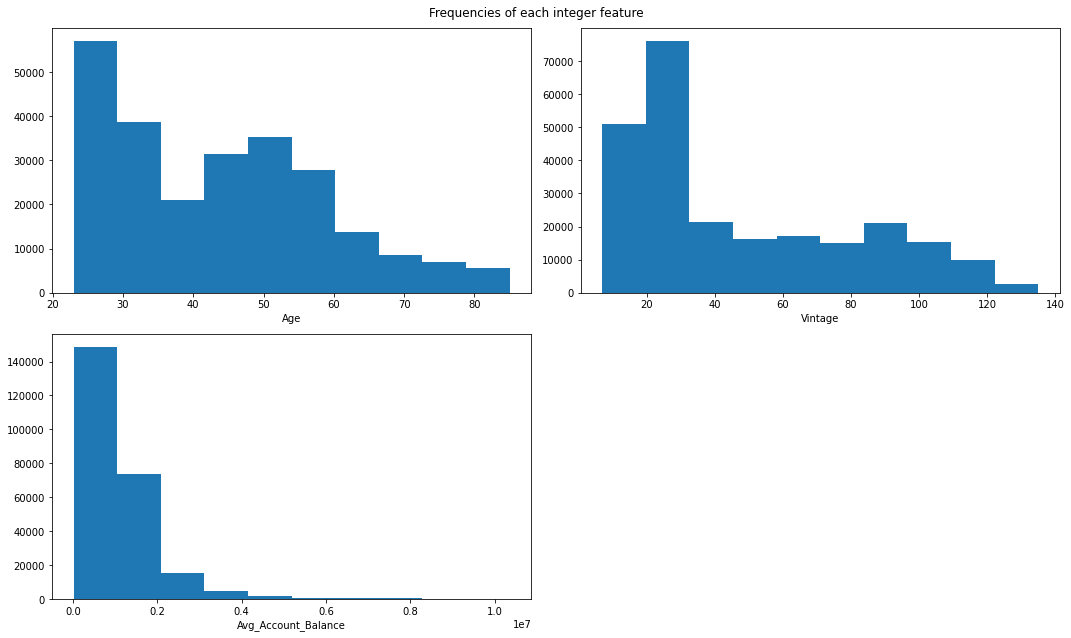

In [7]:
# Frequencies of each integer feature

plt.rcParams['figure.figsize']=[15,9]

for i in range(1,4):
    plt.subplot(2,2,i)
    plt.hist(X_train.select_dtypes(int).iloc[:,i-1])
    plt.xlabel(X_train.select_dtypes(int).iloc[:,i-1].name)

plt.suptitle('Frequencies of each integer feature')
plt.tight_layout()
plt.show()

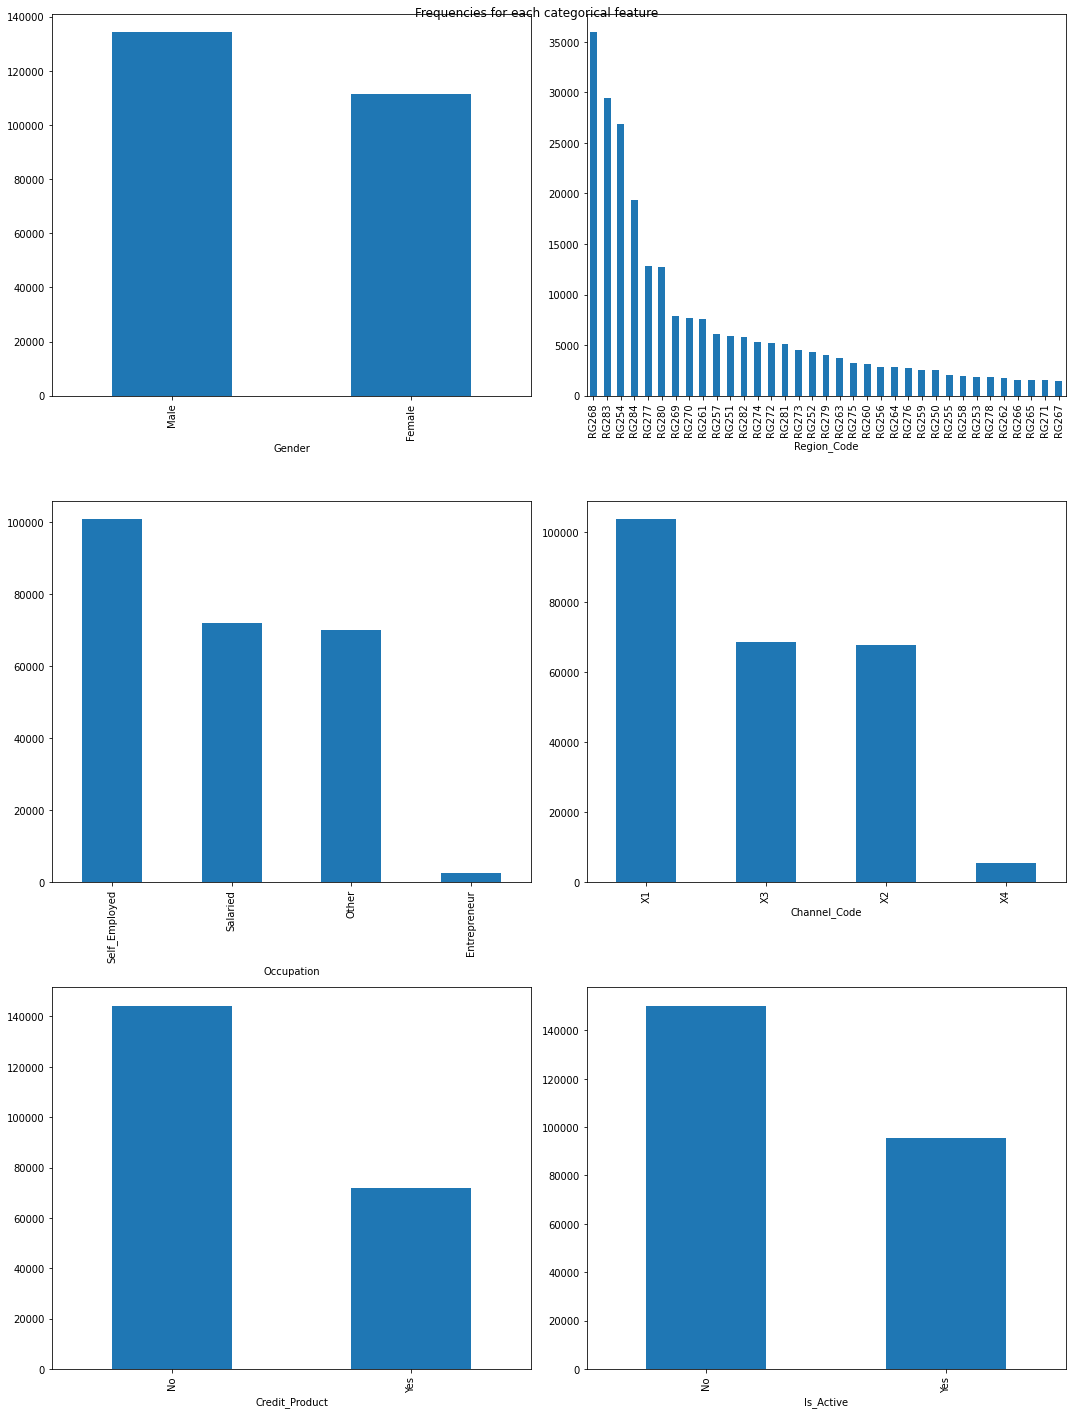

In [8]:
# Frequencies of each categorical feature

plt.rcParams['figure.figsize']=[15,20]

for i in range(1,7):
    plt.subplot(3,2,i)
    X_train.drop(['ID'],1).select_dtypes(object).iloc[:,i-1].value_counts().sort_values(ascending=False).plot(kind='bar')
    plt.xlabel(X_train.drop(['ID'],1).select_dtypes(object).iloc[:,i-1].name)

plt.suptitle('Frequencies for each categorical feature')
plt.tight_layout()
plt.show()

### Analyzing missing values

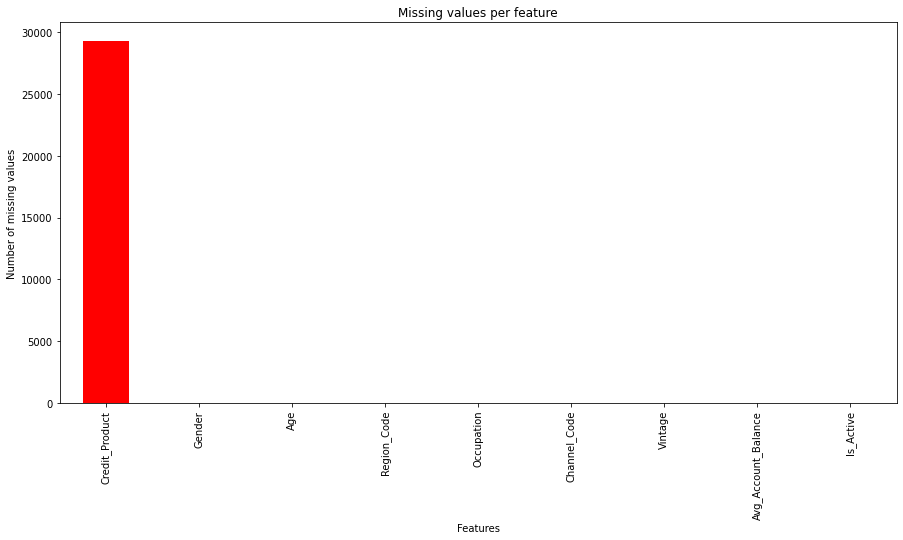

'\nMising values could be:\nMissing not at random - Some relevant factor is responsible for values being missing\nMissing complelety at random - Causes of data missing are completely unrelated to the observed data\nMissing at random - Chances of values being missing are the same for all groups in the data\n'

In [9]:
# Features with missing values in descending order
plt.figure(figsize=(15,7))
X_train.drop(['ID'],1).isna().sum().sort_values(ascending=False).plot(kind='bar',color='r')
plt.xlabel('Features')
plt.ylabel('Number of missing values')
plt.title('Missing values per feature')
plt.show()

'''
Mising values could be:
Missing not at random - Some relevant factor is responsible for values being missing
Missing complelety at random - Causes of data missing are completely unrelated to the observed data
Missing at random - Chances of values being missing are the same for all groups in the data
'''


In [10]:
# Checking relationship between values being missing and dependent variable - significant association

 # Chi2 test on relationship between missing values and dependent variable

p_value=chi2_contingency(pd.crosstab(X_train['Credit_Product'].isna().astype(int),Y_train.iloc[:,0]))[1]

print(p_value) # p-value<<0.05

0.0


In [11]:
Y_train.iloc[:,0].value_counts()/len(Y_train) # Imbalanced classification (76% of values are 0)

0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

### Correlations amongst numeric features

In [12]:
corr=X_train.drop(['ID'],1).select_dtypes(['int']).corr()

corr.style.background_gradient(cmap='coolwarm')

# Vintage and age have a strong positive correlation, rest are very weakly correlated

,Age,Vintage,Avg_Account_Balance
Age,1.000000,0.631242,0.145232
Vintage,0.631242,1.000000,0.167433
Avg_Account_Balance,0.145232,0.167433,1.000000


### Gauging feature importance using boxplots

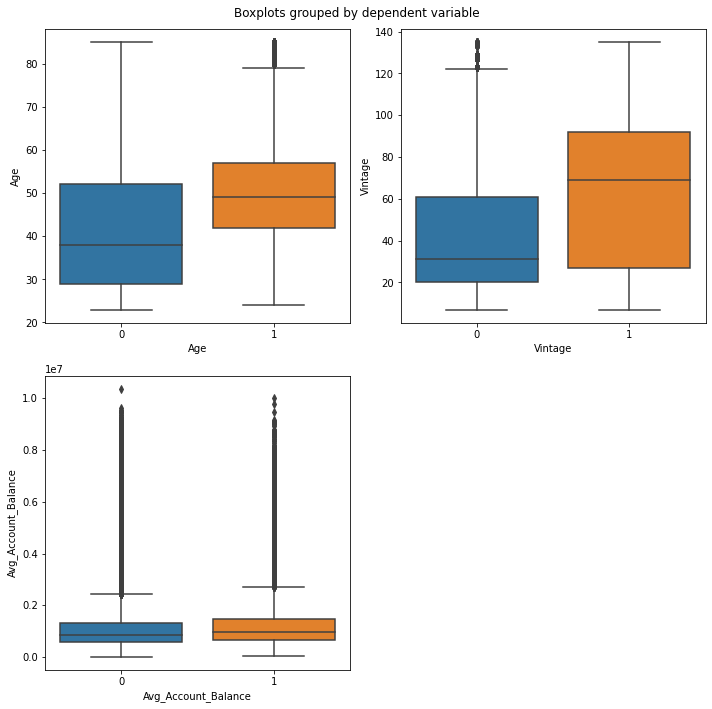

In [13]:
# Plotting boxplots for features

plt.rcParams['figure.figsize']=[10,10]

for i in range(1,4):
    plt.subplot(2,2,i)
    sns.boxplot(Y_train.iloc[:,0],X_train.drop(['ID'],1).select_dtypes(['int']).iloc[:,i-1])
    plt.xlabel(X_train.drop(['ID'],1).select_dtypes(['int']).iloc[:,i-1].name)

plt.suptitle('Boxplots grouped by dependent variable')
plt.tight_layout()
plt.show()

# Ages are on average higher for class 1 than 0. Vintage shows different distributions for the two classes. 

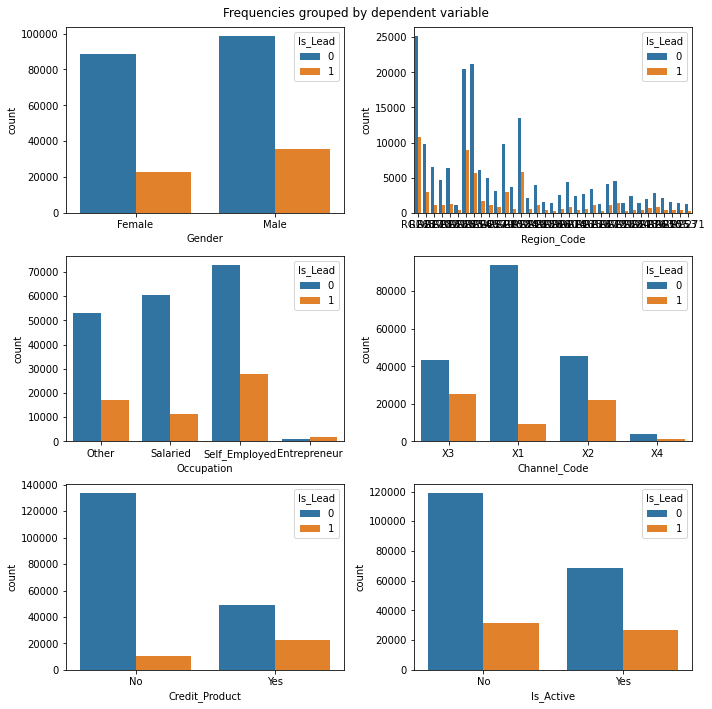

In [16]:
# Checking association between categorical columns and dependent variable

plt.rcParams['figure.figsize']=[10,10]

for i in range(1,7):
    plt.subplot(3,2,i)
    data=X_train.drop(['ID'],1).select_dtypes(['object']).iloc[:,i-1]
    sns.countplot(data,hue=Y_train.iloc[:,0])
    plt.xlabel(X_train.drop(['ID'],1).select_dtypes(['object']).iloc[:,i-1].name)

plt.suptitle('Frequencies grouped by dependent variable')
plt.tight_layout()
plt.show()

# Gender and region_code have similar distributions between 0 and 1 class.


## Observations about the data

* Train data consists of 10 features and 2,45,725 entries 
    * 1 unique id column - one unique id for each entry<br/><br/>
    * Features 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
       'Credit_Product', 'Is_Active' are categorical
        * Region_Code is a high cardinality feature with 35 unique codes<br/><br/>
    * 3 features - 'Age', 'Vintage', 'Avg_Account_Balance' - are integer type
        * All are positively skewed<br/><br/>
    * 1 feature Credit_Product has missing values (29,325)
        * Values being missing is strongly associated with the dependent variable<br/><br/>
    * All 3 numeric features have outliers
        * Age has outliers in class 1
        * Vintage has outliers in class 0
        * Avg_Account_Balance has outliers in both categories<br/><br/>
    * Vintage and Age have a strong positive correlation (0.6-0.8), rest are very weakly correlated<br/><br/>
    * Ages are on average higher for class 1 than 0. Vintage shows different distributions for the two classes<br/><br/>
    * Occupation, Channel_Code, Credit_Product, Is_Active have apparent differences in their distributions with respect to the dependent variable (0/1)



* Dependent variable is imbalanced - 76% of the values are 0